In [49]:
#Step 1: Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
#Step 2:Load CSV
data=pd.read_csv('car_data.csv')

In [51]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [52]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
data=data.dropna()

In [54]:
data.shape

(301, 9)

In [55]:
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2 }},inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_25524\2146079208.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2 }},inplace=True)


In [56]:
data.replace({'Seller_Type':{'Dealer':0, 'Individual':1 }},inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_25524\2634902003.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Seller_Type':{'Dealer':0, 'Individual':1 }},inplace=True)


In [57]:
data.replace({'Transmission':{'Manual':0, 'Automatic':1 }},inplace=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_25524\247673241.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Transmission':{'Manual':0, 'Automatic':1 }},inplace=True)


In [69]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [58]:
#Feature Selection
X = data[['Year','Kms_Driven','Fuel_Type','Selling_Price','Seller_Type','Transmission','Owner']]
y = data['Present_Price']

In [59]:
X

,Year,Kms_Driven,Fuel_Type,Selling_Price,Seller_Type,Transmission,Owner
0,2014,27000,0,3.35,0,0,0
1,2013,43000,1,4.75,0,0,0
2,2017,6900,0,7.25,0,0,0
3,2011,5200,0,2.85,0,0,0
4,2014,42450,1,4.60,0,0,0
...,...,...,...,...,...,...,...
296,2016,33988,1,9.50,0,0,0
297,2015,60000,0,4.00,0,0,0
298,2009,87934,0,3.35,0,0,0
299,2017,9000,1,11.50,0,0,0


In [60]:
y

0       5.59
1       9.54
2       9.85
3       4.15
4       6.87
       ...  
296    11.60
297     5.90
298    11.00
299    12.50
300     5.90
Name: Present_Price, Length: 301, dtype: float64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [63]:
X_test

,Year,Kms_Driven,Fuel_Type,Selling_Price,Seller_Type,Transmission,Owner
177,2016,24000,0,0.35,1,1,0
289,2016,10980,0,10.11,0,0,0
228,2012,60000,1,4.95,0,0,0
198,2011,35000,0,0.15,1,0,1
60,2013,40001,0,6.95,0,0,0
...,...,...,...,...,...,...,...
119,2013,5400,0,1.05,1,0,0
19,2010,41442,0,2.65,0,0,0
181,2016,50000,0,0.30,1,0,0
79,2012,89000,1,14.50,0,1,0


In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array([ 0.6147 , 13.3531 ,  9.7064 ,  0.5948 , 15.365  , 10.6755 ,
        1.9383 ,  0.79788,  0.57922,  8.7378 , 11.398  ,  1.9686 ,
       12.233  ,  0.5428 , 10.1011 ,  6.39   ,  1.36694, 28.1788 ,
        0.58346,  1.738  ,  0.7599 , 10.4337 ,  8.8629 ,  5.1683 ,
        0.96503,  7.6911 ,  9.2541 ,  4.8485 ,  1.7825 ,  1.9188 ,
        0.96609, 15.6765 ,  0.9248 ,  4.4313 , 10.5705 ,  6.6258 ,
       11.3018 ,  9.6078 ,  5.2922 , 10.9149 , 11.925  ,  3.743  ,
        6.302  ,  0.74278,  9.076  ,  0.9315 ,  8.993  , 14.8318 ,
        6.5582 ,  5.5699 ,  8.3189 ,  1.7472 , 29.839  , 28.0742 ,
       13.3756 , 14.8807 ,  6.2474 , 13.5418 ,  5.2689 ,  9.8833 ,
        0.6066 ,  0.6195 ,  0.8303 ,  0.6232 ,  6.4969 ,  1.992  ,
       31.0554 , 29.68   ,  9.5974 ,  0.94346,  5.6677 , 10.8518 ,
        7.1432 ,  7.4339 ,  3.2307 ,  2.1992 ,  0.8365 , 14.3166 ,
        0.55166, 12.9711 ,  6.6507 ,  5.0315 , 15.4128 , 27.7965 ,
        5.9084 ,  0.5524 ,  1.3914 ,  6.0875 ,  0.56816, 23.38

In [74]:
single_row=[[2016,	10980,	0	,10.11,	0,	0	,0]]


prediction = model.predict(single_row)

print("Predicted Present Price:", prediction[0])


Predicted Present Price: 13.353099999999998


c:\Users\asus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [68]:
mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse) 

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"RMSE: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 7.104655831738461
RMSE: 2.665456026975208
MAE: 7.104655831738461
R^2 Score: 0.8894248752497194


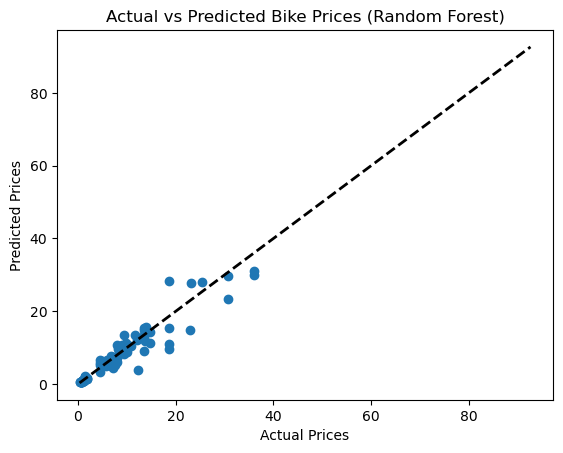

In [75]:
# Visualize predictions vs actual prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Bike Prices (Random Forest)')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()